LINEAR REGRESSION

(0.0, 6.0, 0.0, 20.0)

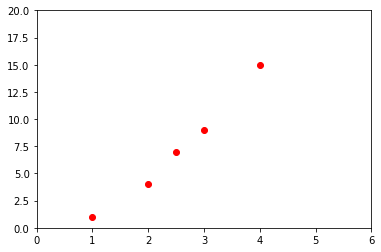

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = [1, 2, 2.5, 3, 4]
y = [1, 4, 7, 9, 15]
plt.plot(x,y,'ro')
plt.axis([0,6,0,20])

EXAMPLE OF LINE OF BEST FIT FOR ABOVE GRAPH

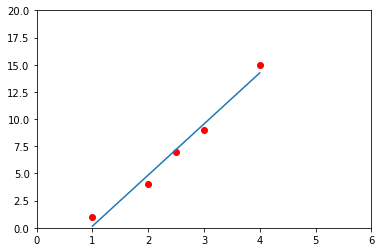

In [2]:
plt.plot(x, y, 'ro')
plt.axis([0, 6, 0, 20])
plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)))
plt.show()

STARTING MAIN LEARNING

In [3]:
%tensorflow_version 2.x

UsageError: Line magic function `%tensorflow_version` not found.


In [4]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc

import tensorflow as tf

In [5]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # training data, pd.read_csv() returns a dataframe
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # testing data
y_train = dftrain.pop('survived')            # POP survived column from dataset dftrain and put it in y_train
y_eval = dfeval.pop('survived')              # Same as above
print(dftrain.head())                        # .head() shows first 5 items of dataframe

      sex   age  n_siblings_spouses  parch     fare  class     deck  \
0    male  22.0                   1      0   7.2500  Third  unknown   
1  female  38.0                   1      0  71.2833  First        C   
2  female  26.0                   0      0   7.9250  Third  unknown   
3  female  35.0                   1      0  53.1000  First        C   
4    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


In [6]:
print(dftrain.loc[0],y_train[0])      # .loc[] prints all features of a certain row

sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object 0


In [7]:
print(dftrain.describe())    # Statistical analysis of our data

              age  n_siblings_spouses       parch        fare
count  627.000000          627.000000  627.000000  627.000000
mean    29.631308            0.545455    0.379585   34.385399
std     12.511818            1.151090    0.792999   54.597730
min      0.750000            0.000000    0.000000    0.000000
25%     23.000000            0.000000    0.000000    7.895800
50%     28.000000            0.000000    0.000000   15.045800
75%     35.000000            1.000000    0.000000   31.387500
max     80.000000            8.000000    5.000000  512.329200


In [8]:
dftrain.shape   # 627 entries and 9 features

(627, 9)

In [9]:
print(y_train.head())

0    0
1    1
2    1
3    1
4    0
Name: survived, dtype: int64


GRAPH REPRESENTATION

<AxesSubplot:>

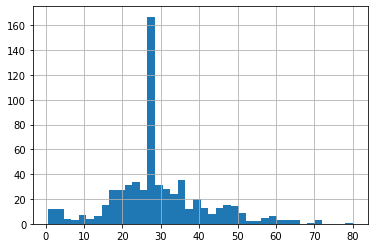

In [10]:
dftrain.age.hist(bins=40)

<AxesSubplot:>

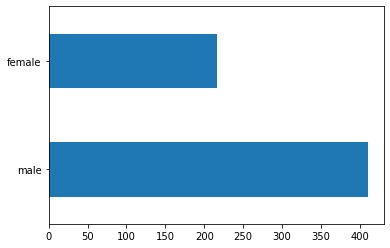

In [11]:
dftrain.sex.value_counts().plot(kind='barh')

<AxesSubplot:>

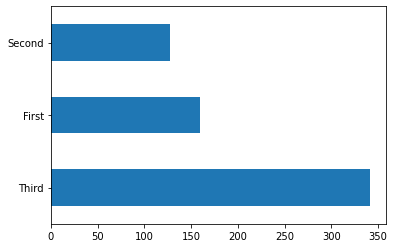

In [15]:
dftrain['class'].value_counts().plot(kind='barh')

Text(0.5, 0, '% survive')

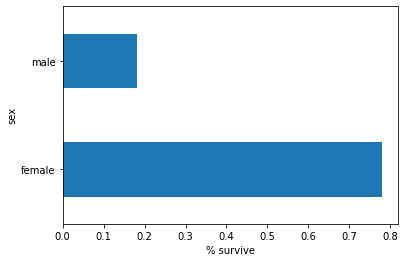

In [13]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')